In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
import easydarkfigs
%matplotlib inline

In [2]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [3]:
%%time
from results import models, results, pcmds, data, radii_am, radii_kpc, dmods, regions

M87
M49
NGC3377
CPU times: user 14.3 s, sys: 489 ms, total: 14.8 s
Wall time: 14.9 s


In [4]:
%%time
from drivers import filters, iso_models, drivers

Loading Isochrone Models


GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.

CPU times: user 55.9 s, sys: 11.6 s, total: 1min 7s
Wall time: 1min 8s


GPU acceleration not available. Continuing without.

In [5]:
plt.style.use('cook')

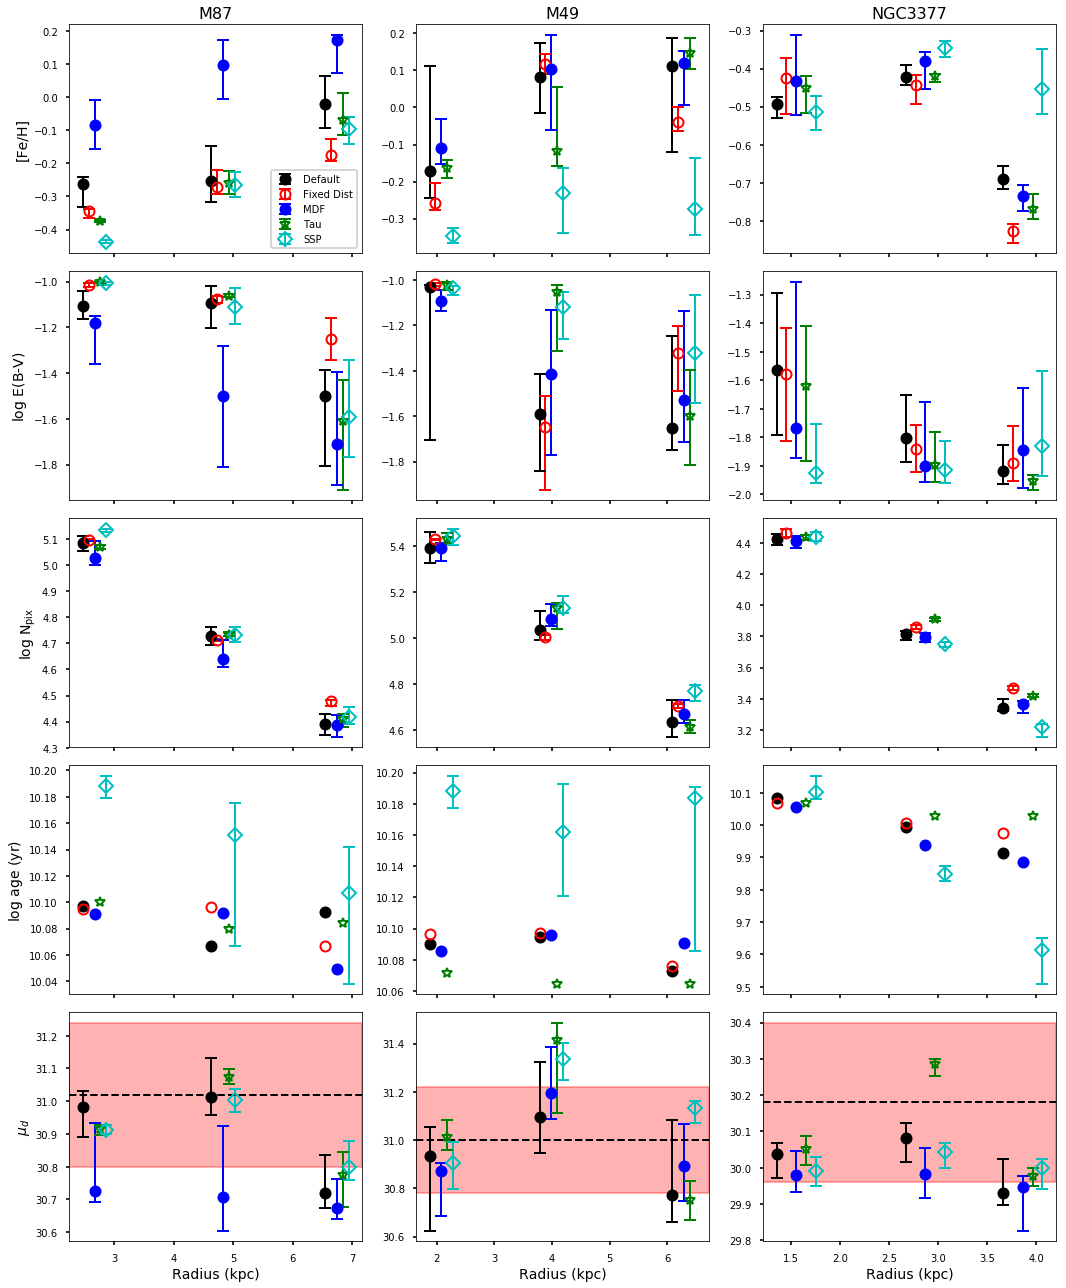

In [6]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(15, 18), sharex='col', sharey=False)
for i, g in enumerate(['M87', 'M49', 'NGC3377']):
    a = axes[:,i]
    for j, r in enumerate(['a', 'b', 'c']):

        k = f'{g}_{r}1_m1'
        c,m,mfc = 'k','o','k'
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]-0.2, color=c, marker=m, mfc=mfc, label=('Default' if j==0 else None))
        a[3].plot(radii_kpc[k]-0.2, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}1_m2'
        c,m,mfc = 'r','o','None'
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[2]], x=radii_kpc[k]-0.1,  color=c, marker=m, mfc=mfc,  label=('Fixed Dist' if j==0 else None))
        a[3].plot(radii_kpc[k]-0.2, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}1_m3'
        c,m,mfc = 'b','o','b'
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k],  color=c, marker=m, mfc=mfc,  label=('MDF' if j==0 else None))
        a[3].plot(radii_kpc[k], results[k].best_model.sfh_model.mean_age, color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}1_m4'
        c,m,mfc = 'g','*','None'
        results[k].plot_errorbars([a[0], a[1], a[2], None, a[4]], x=radii_kpc[k]+0.1,  color=c, marker=m, mfc=mfc,  label=('Tau' if j==0 else None))
        a[3].plot(radii_kpc[k]+0.1, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}1_m5'
        c,m,mfc = 'c','D','None'
        results[k].plot_errorbars(a, x=radii_kpc[k]+0.2,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
#         a[3].plot(radii_kpc[k], results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)
    a[-1].axhline(y=dmods[g], ls='--', color='k')
    a[-1].axhspan(dmods[g]-0.22, dmods[g]+0.22, color='r', alpha=0.3)
    a[0].set_title(g)
axes[0,0].legend(loc=0, fontsize=10)
for a in axes[-1]:
    a.set_xlabel('Radius (kpc)')
for i, a in enumerate(axes[:,0]):
    a.set_ylabel(results['M87_a1_m5'].labels[i])
fig.tight_layout()

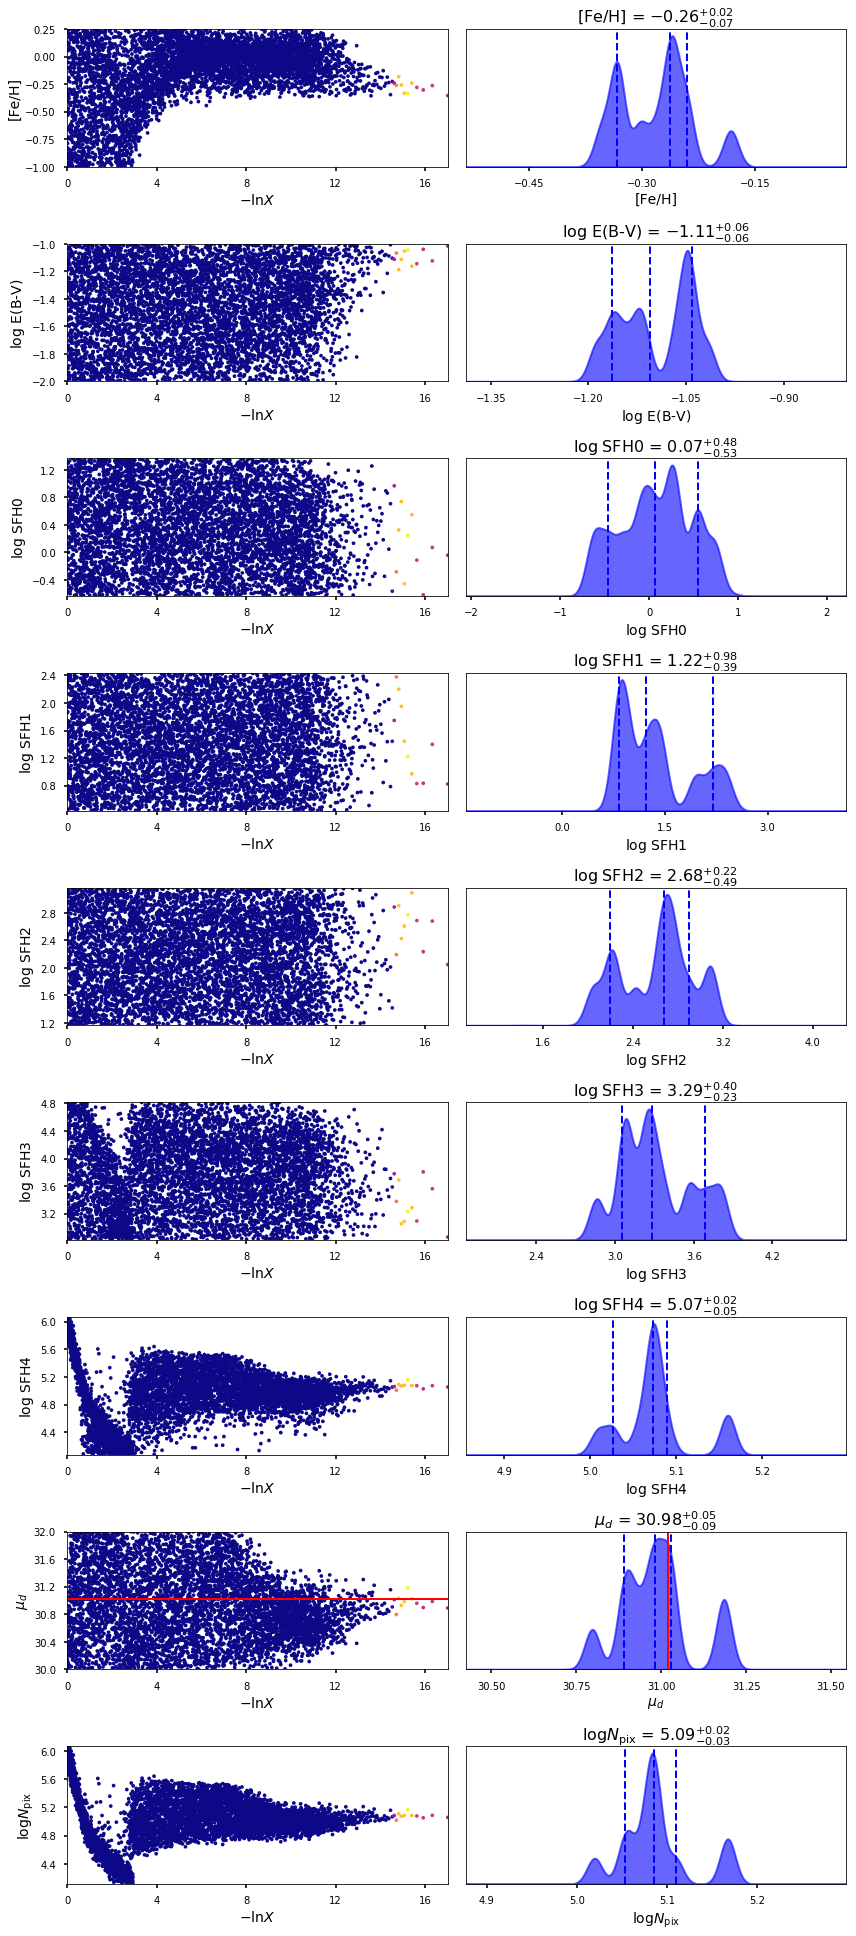

In [7]:
fig, axes = results['M87_a1_m1'].plot_trace();

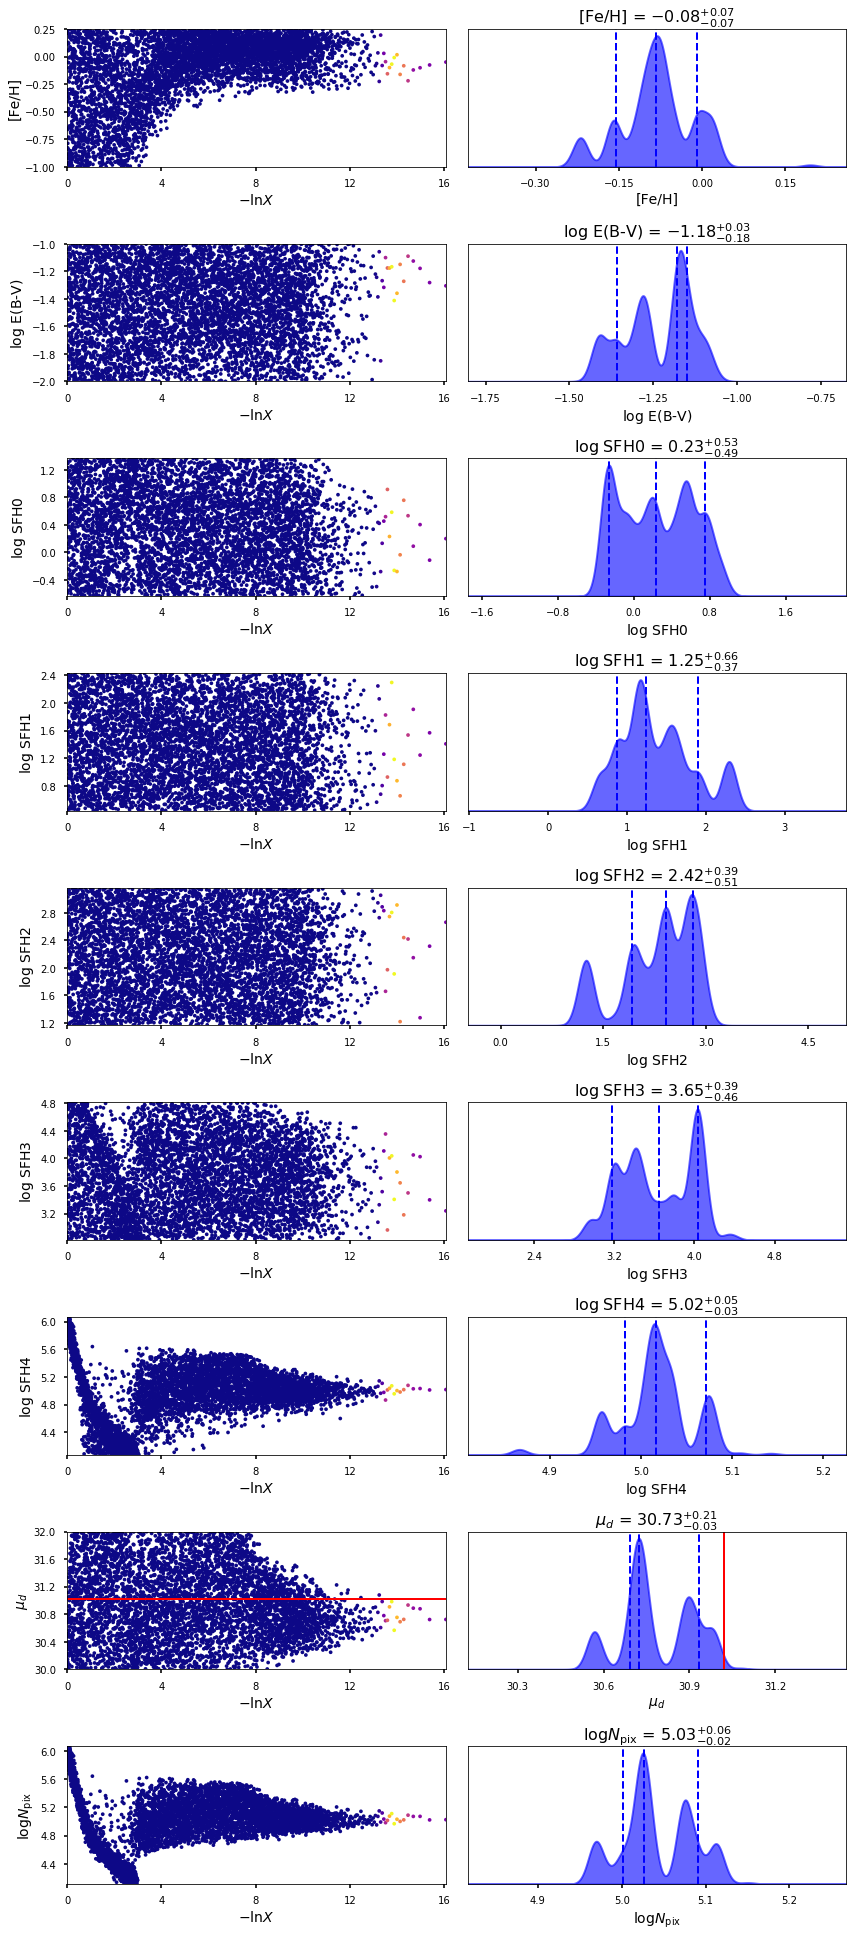

In [8]:
fig, axes = results['M87_a1_m3'].plot_trace();

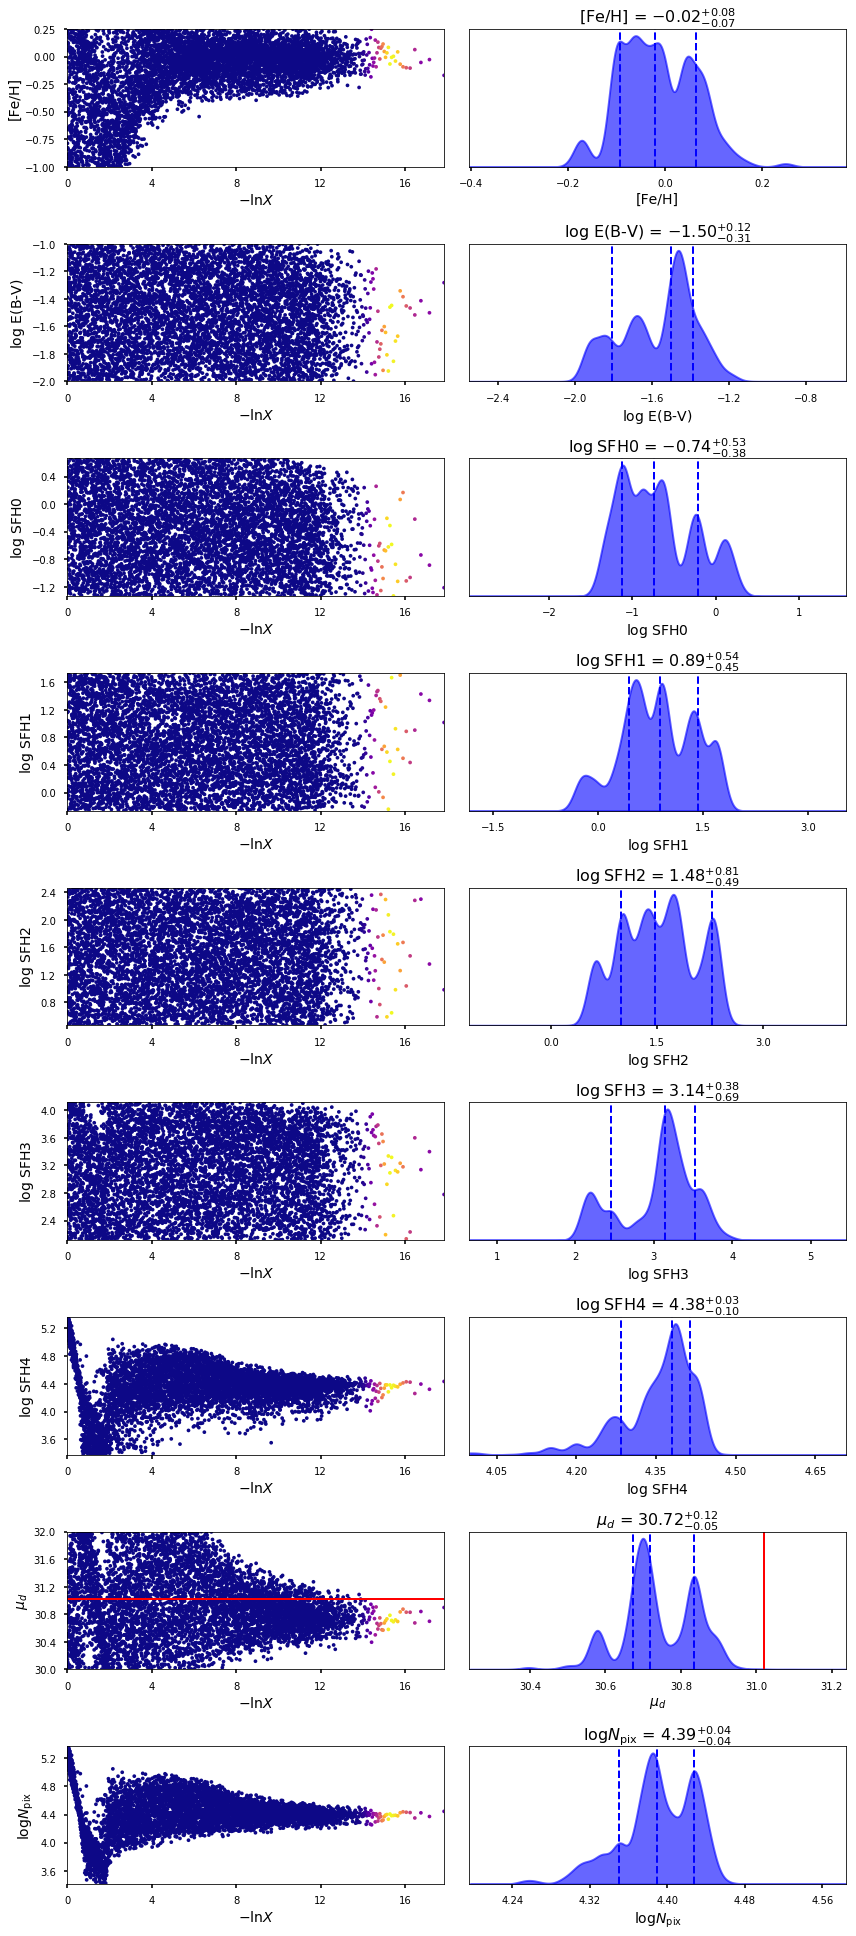

In [9]:
fig, axes = results['M87_c1_m1'].plot_trace();

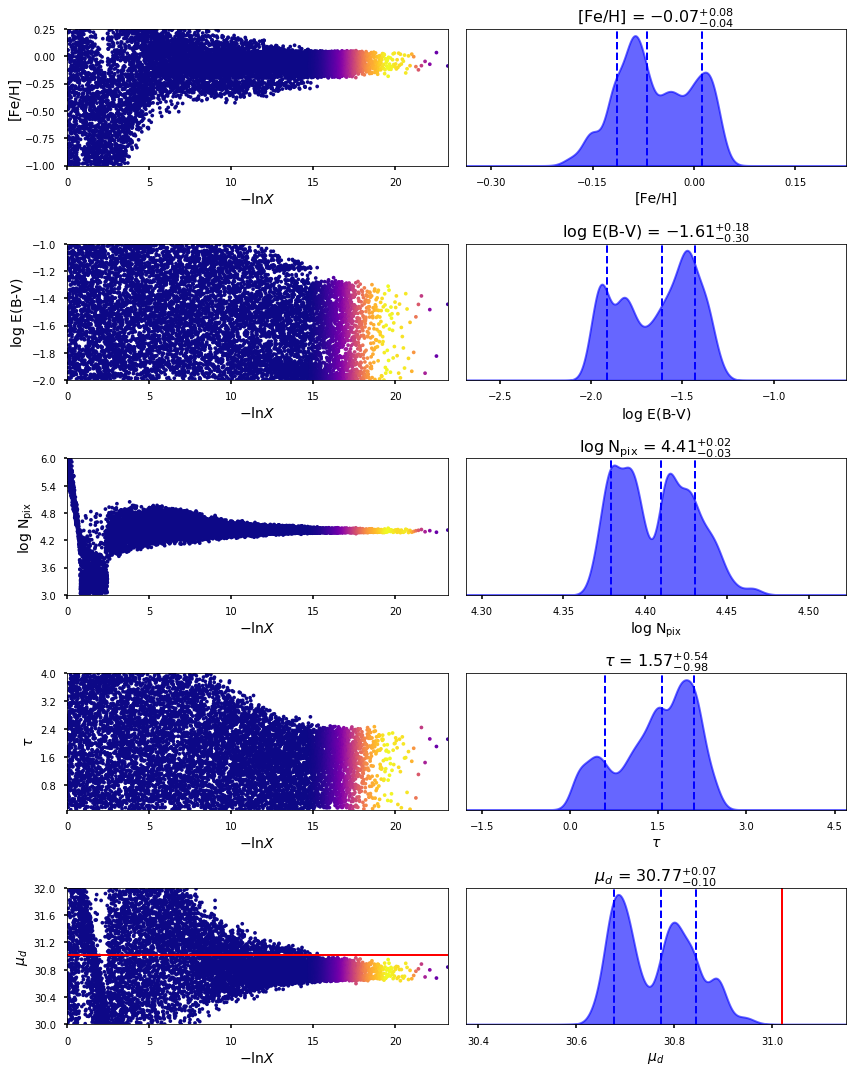

In [10]:
fig, axes = results['M87_c1_m4'].plot_trace();

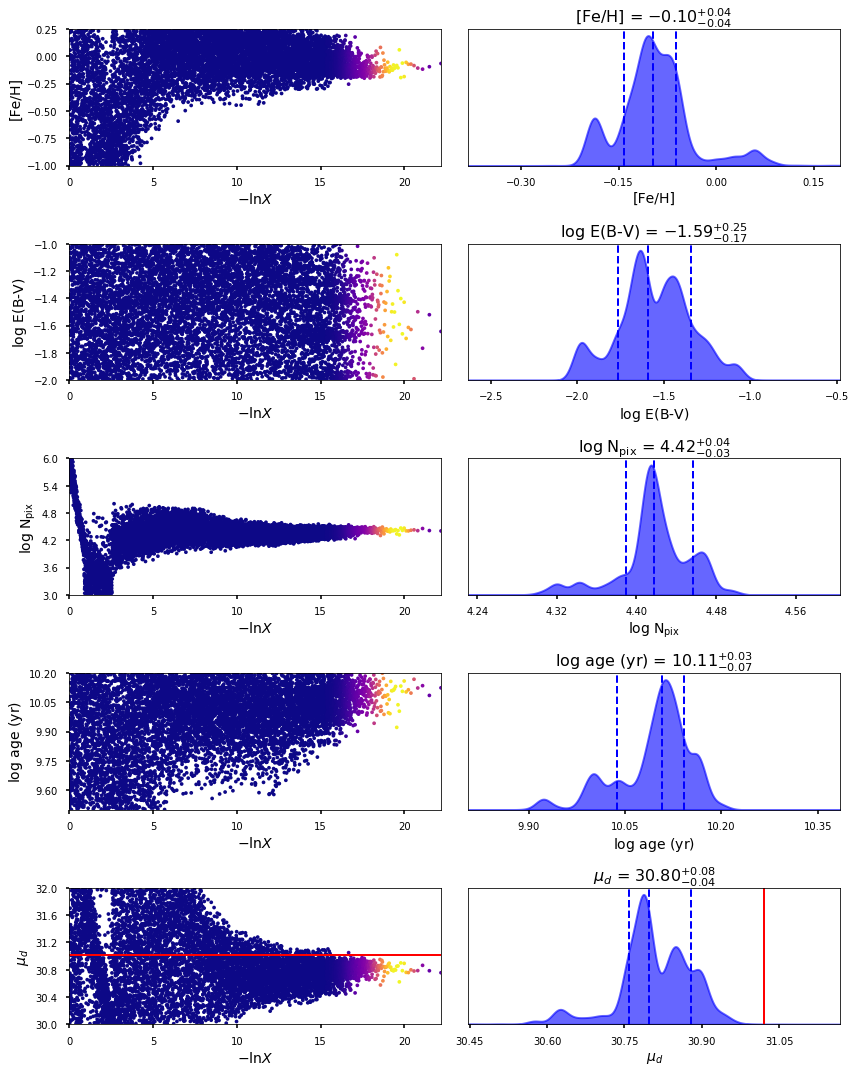

In [11]:
fig, axes = results['M87_c1_m5'].plot_trace();

In [12]:
g = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance()
)

In [19]:
g = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.3),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance()
)

In [13]:
test_pcmds = {}
for feh in [0.5, 0.25, 0.0, -0.25, -0.5, -0.75, -1.0]:
    g.set_params(np.array([feh, -2.0, 5.0, 10.0, 30.0]))
    test_pcmds[feh],_ = drivers['NGC3377'].simulate(g, 256)

In [20]:
g.set_params(np.array([0.0, -2.0, 5.0, 10.0, 30.0]))
test_pcmds['MDF'], _ = drivers['NGC3377'].simulate(g, 256)

(24.7, 23.5)

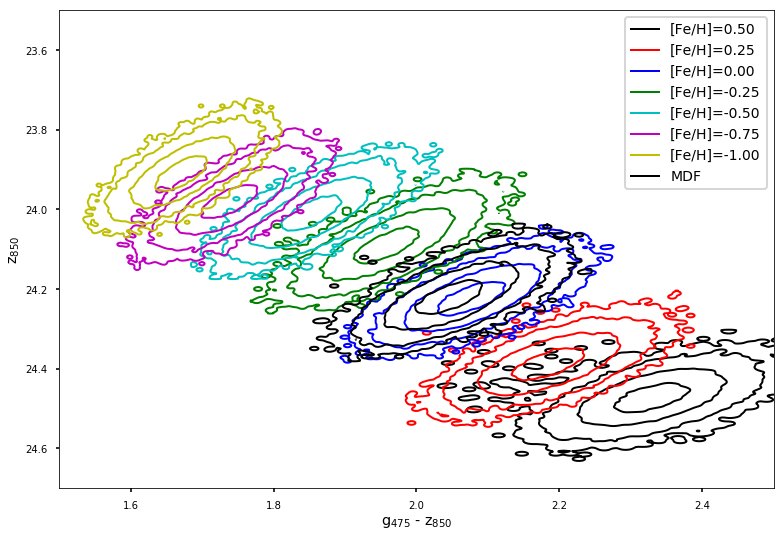

In [22]:
colors = ['k','r','b','g','c', 'm', 'y']
fig, ax = plt.subplots()
for i, (k,v) in enumerate(test_pcmds.items()):
    if k == 'MDF':
        continue
    ppy.plotting.plot_pcmd_contours(v, ax=ax, label=f'[Fe/H]={k:.2f}', color=colors[i])
ppy.plotting.plot_pcmd_contours(test_pcmds['MDF'], ax=ax, label='MDF', color='k', ls=':')
ax.legend(loc=0)
ppy.plotting.plot_isochrone(iso_models['NGC3377'], alpha=0., axes=ax)
ax.set_xlim([1.5, 2.5])
ax.set_ylim([24.7, 23.5])

In [23]:
for k,v in test_pcmds.items():
    print(k, np.std(v,axis=1))

0.5 [0.03569467 0.05096166]
0.25 [0.03901362 0.04924891]
0.0 [0.04176508 0.04727827]
-0.25 [0.04459576 0.04542403]
-0.5 [0.04391592 0.04157494]
-0.75 [0.04281707 0.03825038]
-1.0 [0.04349577 0.03608941]
MDF [0.04210905 0.04631982]


In [16]:
ppy.distancemodels.dmod_to_mpc(31.0)

15.848931924611142

In [17]:
ppy.distancemodels.dmod_to_mpc(30.18)

10.864256236170656

In [18]:
ppy.distancemodels.dmod_to_mpc(33)

39.810717055349734